In [1]:
import pandas as pd
# ensure that all columns are shown and that colum content is not cut
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',1000)
pd.set_option('display.max_rows', 500) # ensure that all rows are shown

# `CashFlowStandardizer`

In the `07_00_stanardizer_basics.ipynb` we looked at the basic principles of the standardizer. And now we are going to explore the details of the `CashFlowStandardizer`.

## Main Goal
The main Goal of the `CashFlowStandardizer` is to provide a consilidated, standardized view that contains the main positions of an cash flow statement.

The current implementation tries to find/calculate the values for the following positions:

<pre>
        NetCashProvidedByUsedInOperatingActivities
          CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations
          NetCashProvidedByUsedInOperatingActivitiesContinuingOperations
              DepreciationDepletionAndAmortization
              DeferredIncomeTaxExpenseBenefit
              ShareBasedCompensation
              IncreaseDecreaseInAccountsPayable
              IncreaseDecreaseInAccruedLiabilities
              InterestPaidNet
              IncomeTaxesPaidNet

        NetCashProvidedByUsedInInvestingActivities
            CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations
            NetCashProvidedByUsedInInvestingActivitiesContinuingOperations
              PaymentsToAcquirePropertyPlantAndEquipment
              ProceedsFromSaleOfPropertyPlantAndEquipment
              PaymentsToAcquireInvestments
              ProceedsFromSaleOfInvestments
              PaymentsToAcquireBusinessesNetOfCashAcquired
              ProceedsFromDivestitureOfBusinessesNetOfCashDivested
              PaymentsToAcquireIntangibleAssets
              ProceedsFromSaleOfIntangibleAssets

        NetCashProvidedByUsedInFinancingActivities
            CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations
            NetCashProvidedByUsedInFinancingActivitiesContinuingOperations
              ProceedsFromIssuanceOfCommonStock
              ProceedsFromStockOptionsExercised
              PaymentsForRepurchaseOfCommonStock
              ProceedsFromIssuanceOfDebt
              RepaymentsOfDebt
              PaymentsOfDividends


        EffectOfExchangeRateFinal
        CashPeriodIncreaseDecreaseIncludingExRateEffectFinal

        CashAndCashEquivalentsEndOfPeriod
</pre>

**Note:**
- EffectOfExchangeRateFinal is the final value for different EffectOnExchangeRate related tags
- CashPeriodIncreaseDecreaseIncludingExRateEffectFinal is the final value for Increase/Decrease of Cash
- CashAndCashEquivalentsEndOfPeriod: only Cash at EndOfPeriod is shown.

The CashFlow is way more straight forward than the IncomeStatement of the  BalanceSheet, when it comes to fill in and calculate gaps.

## Prepare the dataset

As input, we are going to use the dataset which was created with the `06_bulk_data_processing_deep_dive.ipynb`. That dataset contains all available data for the Cash Flow statements. The path to this dataset - on my machine - is either `set/parallel/CF/joined` or `set/serial/CF/joined` depending whether it was produced with the faster parallel or slower serial processing approach.

The data is already filtered for 10-K and 10-Q reports. Moreover, the following filters were applied as well: `ReportPeriodRawFilter`, `MainCoregRawFilter`, `OfficialTagsOnlyRawFilter`, `USDOnlyRawFilter`. The dataset is already joined, so we can use it directly with the `CashFlowStandardizer`.

Of course, if you prefer another dataset, for instance all data of a few companies, or all data of a single year, feel free to do so.

    # As an alternative, using the data of a single year
    from secfsdstools.d_container.databagmodel import JoinedDataBag
    from secfsdstools.e_collector.zipcollecting import ZipCollector
    from secfsdstools.u_usecases.bulk_loading import default_postloadfilter

    collector = ZipCollector.get_zip_by_names(names=["2022q1.zip", "2022q2.zip", "2022q3.zip", "2022q4.zip"], 
                                              forms_filter=["10-K", "10-Q"],                                        
                                              stmt_filter=["CF"], post_load_filter=default_postloadfilter)

    all_is_joinedbag: JoinedDataBag = collector.collect().join()
    
    from secfsdstools.d_container.databagmodel import JoinedDataBag
    from secfsdstools.f_standardize.cf_standardize import CashFlowStandardizer

    cf_standardizer = CashFlowStandardizer()

    # standardize the data
    all_cf_joinedbag.present(cf_standardizer)    

This might take 30-60 seconds, depending on your hardware.

In [2]:
from secfsdstools.d_container.databagmodel import JoinedDataBag
from secfsdstools.f_standardize.cf_standardize import CashFlowStandardizer

all_cf_joinedbag:JoinedDataBag = JoinedDataBag.load(target_path="/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/set/parallel/CF/joined")
cf_standardizer = CashFlowStandardizer()

# standardize the data
all_cf_joinedbag.present(cf_standardizer)

,adsh,cik,name,form,fye,fy,fp,date,filed,coreg,report,ddate,qtrs,NetCashProvidedByUsedInOperatingActivitiesContinuingOperations,NetCashProvidedByUsedInFinancingActivitiesContinuingOperations,NetCashProvidedByUsedInInvestingActivitiesContinuingOperations,NetCashProvidedByUsedInOperatingActivities,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations,CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations,CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations,EffectOfExchangeRateFinal,CashPeriodIncreaseDecreaseIncludingExRateEffectFinal,CashAndCashEquivalentsEndOfPeriod,DepreciationDepletionAndAmortization,DeferredIncomeTaxExpenseBenefit,ShareBasedCompensation,IncreaseDecreaseInAccountsPayable,IncreaseDecreaseInAccruedLiabilities,InterestPaidNet,IncomeTaxesPaidNet,PaymentsToAcquirePropertyPlantAndEquipment,ProceedsFromSaleOfPropertyPlantAndEquipment,PaymentsToAcquireInvestments,ProceedsFromSaleOfInvestments,PaymentsToAcquireBusinessesNetOfCashAcquired,ProceedsFromDivestitureOfBusinessesNetOfCashDivested,PaymentsToAcquireIntangibleAssets,ProceedsFromSaleOfIntangibleAssets,ProceedsFromIssuanceOfCommonStock,ProceedsFromStockOptionsExercised,PaymentsForRepurchaseOfCommonStock,ProceedsFromIssuanceOfDebt,RepaymentsOfDebt,PaymentsOfDividends,BaseOpAct_error,BaseOpAct_cat,BaseFinAct_error,BaseFinAct_cat,BaseInvAct_error,BaseInvAct_cat,NetCashContOp_error,NetCashContOp_cat,CashEoP_error,CashEoP_cat
327767,0001096906-21-001168,1089297,NOVAGANT CORP,10-K,1231,2004.0,FY,2004-12-31,20210517,,6,20041231,4,-2.100000e+01,0.000000e+00,0.000000e+00,-2.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327768,0001096906-21-001172,1089297,NOVAGANT CORP,10-K,1231,2005.0,FY,2005-12-31,20210517,,6,20051231,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327771,0001096906-21-001180,1089297,NOVAGANT CORP,10-K,1231,2006.0,FY,2006-12-31,20210517,,6,20061231,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327772,0001096906-21-001182,1089297,NOVAGANT CORP,10-K,1231,2007.0,FY,2007-12-31,20210517,,6,20071231,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327773,0001096906-21-001184,1089297,NOVAGANT CORP,10-K,1231,2008.0,FY,2008-12-31,20210517,,6,20081231,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102627,0001758699-24-000023,1758699,TRANSUITE.ORG INC.,10-Q,1130,2024.0,Q2,2024-05-31,20240617,,5,20240531,2,-4.996900e+04,4.996900e+04,0.000000e+00,-4.996900e+04,4.996900e+04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,10815.0,NaN,NaN,NaN,-18001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102511,0001193125-24-168943,40704,GENERAL MILLS INC,10-K,0531,2024.0,FY,2024-05-31,20240626,,8,20240531,4,3.302600e+09,-2.272300e+09,-1.197400e+09,3.302600e+09,-2.272300e+09,-1.197400e+09,0.0,0.0,0.0,-400000.0,-167500000.0,418000000.0,552700000.0,NaN,953

First, we will save the results, including all the logs, so that we can use the data directly in the future, without the need to process it again.<br>

In [3]:
import os
target_path = "/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/standardized/CF"
os.makedirs(target_path, exist_ok=True)

cf_standardizer.get_standardize_bag().save(target_path)

ValueError: the target_path /Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/standardized/CF is not empty

## Load the dataset
Once the data has been processed and saved, you can load it directly with the following code.

In [4]:
from secfsdstools.f_standardize.standardizing import StandardizedBag

cf_standardizer_result_bag = StandardizedBag.load("/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/standardized/CF")

In [5]:
cf_standardizer_result_bag.result_df.shape

(335865, 56)

## Overview

Before we dive into what the `CashFlowStandardizer` does in detail, lets get a first impression of the the produced data. First, let us see how many rows we have.

In [6]:
print("Cash flow statements: ", len(cf_standardizer_result_bag.result_df))
print("filed reports: ", len(cf_standardizer_result_bag.result_df.adsh.unique()))

Cash flow statements:  335865
filed reports:  332485


While we have about 320'000 reports (which is also about the same number of balance sheets, which we analyzed in notebook 07_01_BS_standardizer).

Next, a good idea is to look at the `validation_overview_df`. This table gives an idea about the "quality" of the dateset based on the summary of the results of the applied validation rules.

In [7]:
cf_standardizer_result_bag.validation_overview_df

,BaseOpAct_cat,BaseFinAct_cat,BaseInvAct_cat,NetCashContOp_cat,CashEoP_cat,BaseOpAct_cat_pct,BaseFinAct_cat_pct,BaseInvAct_cat_pct,NetCashContOp_cat_pct,CashEoP_cat_pct
0,335654,335838,335784,324444,323581.0,99.94,99.99,99.98,96.60,96.34
1,26,8,13,3302,NaN,0.01,0.00,0.00,0.98,NaN
5,4,2,4,1839,NaN,0.00,0.00,0.00,0.55,NaN
10,7,4,6,872,NaN,0.00,0.00,0.00,0.26,NaN
100,174,13,58,5408,12284.0,0.05,0.00,0.02,1.61,3.66


This seems to be quite ok, since we have around 96% of the data in the first two to three categories. As a reminder, Category 0 means it is an exact match, catagory 1 means that it is less than 1 percent off the expected value (see notebook `07_00_standardizer_basics.ipynb` for details).

In [8]:
cf_standardizer_result_bag.result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335865 entries, 327767 to 102570
Data columns (total 56 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   adsh                                                            335865 non-null  object        
 1   cik                                                             335865 non-null  int64         
 2   name                                                            335865 non-null  object        
 3   form                                                            335865 non-null  object        
 4   fye                                                             335865 non-null  object        
 5   fy                                                              335862 non-null  float64       
 6   fp                                                              335862 non-n

In [11]:
cf_narrow = cf_standardizer_result_bag.result_df.copy().iloc[:, :24]
cf_narrow.dropna(inplace=True)
#cf_narrow['n_cik'] = cf_narrow.groupby('cik')['cik'].transform('count')
#cf_narrow.info()


In [12]:
#cf_narrow_filter = cf_narrow[cf_narrow.n_cik >= 16].reset_index()
#cf_narrow_filter.info()

In [14]:
#cf_narrow_filter.cik.nunique()
cf_narrow.cik.nunique()

13968

In [15]:
#cf_narrow_filter.to_csv('/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/df/cash_flow_narrow.csv')
cf_narrow.to_csv('/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/df/cash_flow_full.csv')


In [43]:
cf_extended = cf_standardizer_result_bag.result_df.copy().iloc[:, :46]
cf.shape


(335865, 46)

In [44]:
drop_cols = ['DeferredIncomeTaxExpenseBenefit', 
             'IncreaseDecreaseInAccountsPayable', 
             'IncreaseDecreaseInAccruedLiabilities', 'InterestPaidNet', 'IncomeTaxesPaidNet']

cf_extended.drop(columns=drop_cols, axis=1, inplace=True)
cf_extended.shape

(335865, 41)

In [65]:
def change_null(row):
    output = []
    for val in row:
        if val != val:
            val = 0
        output.append(val)
        
    return output

In [68]:
proceeds = ['ProceedsFromSaleOfPropertyPlantAndEquipment',
'ProceedsFromSaleOfInvestments',
'ProceedsFromDivestitureOfBusinessesNetOfCashDivested',
'ProceedsFromSaleOfIntangibleAssets',
'ProceedsFromIssuanceOfCommonStock',
'ProceedsFromStockOptionsExercised',
'ProceedsFromIssuanceOfDebt']

cf_extended['Proceeds'] = cf_extended.apply(lambda x: sum(change_null(x[proceeds])), axis=1)
cf_extended.drop(columns=proceeds, inplace=True)
cf_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335865 entries, 327767 to 102570
Data columns (total 35 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   adsh                                                            335865 non-null  object        
 1   cik                                                             335865 non-null  int64         
 2   name                                                            335865 non-null  object        
 3   form                                                            335865 non-null  object        
 4   fye                                                             335865 non-null  object        
 5   fy                                                              335862 non-null  float64       
 6   fp                                                              335862 non-n

In [69]:
payments = ['PaymentsToAcquirePropertyPlantAndEquipment',
'PaymentsToAcquireInvestments',
'PaymentsToAcquireBusinessesNetOfCashAcquired',
'PaymentsToAcquireIntangibleAssets',
'PaymentsForRepurchaseOfCommonStock',
'RepaymentsOfDebt',
'PaymentsOfDividends']

cf_extended['Payments'] = cf_extended.apply(lambda x: sum(change_null(x[payments])), axis=1)
cf_extended.drop(columns=payments, inplace=True)
cf_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335865 entries, 327767 to 102570
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   adsh                                                            335865 non-null  object        
 1   cik                                                             335865 non-null  int64         
 2   name                                                            335865 non-null  object        
 3   form                                                            335865 non-null  object        
 4   fye                                                             335865 non-null  object        
 5   fy                                                              335862 non-null  float64       
 6   fp                                                              335862 non-n

In [70]:
cf_extended.dropna(inplace=True)
cf_extended['n_cik'] = cf_extended.groupby('cik')['cik'].transform('count')
cf_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183942 entries, 187955 to 102570
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   adsh                                                            183942 non-null  object        
 1   cik                                                             183942 non-null  int64         
 2   name                                                            183942 non-null  object        
 3   form                                                            183942 non-null  object        
 4   fye                                                             183942 non-null  object        
 5   fy                                                              183942 non-null  float64       
 6   fp                                                              183942 non-n

In [71]:
cf_extended_filter = cf_extended[cf_extended.n_cik >= 16].reset_index()
cf_extended_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153938 entries, 0 to 153937
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   index                                                           153938 non-null  int64         
 1   adsh                                                            153938 non-null  object        
 2   cik                                                             153938 non-null  int64         
 3   name                                                            153938 non-null  object        
 4   form                                                            153938 non-null  object        
 5   fye                                                             153938 non-null  object        
 6   fy                                                              153938 non-n

In [72]:
cf_extended_filter.cik.nunique()

4304

In [73]:
cf_extended_filter.to_csv('/Users/christophernance/code/cnance09/Small-Cap-Scout/raw_data/secfsdstools/df/cash_flow_extended.csv')


## Analysis on the whole dataset
The following examples are just some ideas to show, what we can do now with the standardized cash flow statement dataset.

First let us have a look at the distribution of CashPeriodIncreaseDecreaseIncludingExRateEffectFinal with a box plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc578310>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc578850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc578070>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc578d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc579030>],
 'means': []}

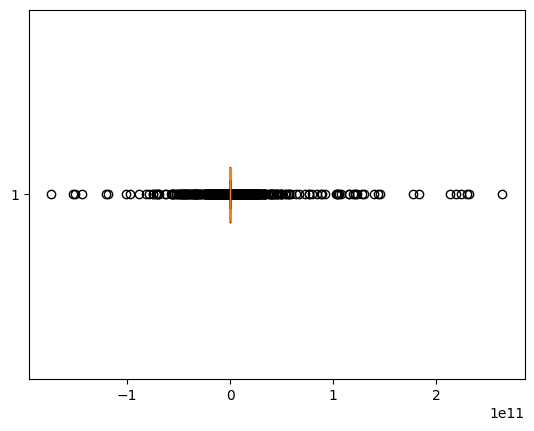

In [9]:
import matplotlib.pyplot as plt
data = cf_standardizer_result_bag.result_df.CashPeriodIncreaseDecreaseIncludingExRateEffectFinal
data = data[~data.isnull()]

plt.boxplot(data, vert=False)
#plt.xscale('log') # using a logarithmic scale, we will lose negativ values though

Let's figure out, which report has the highest CashPeriodIncreaseDecreaseIncludingExRateEffectFinal and then try to show the history of the CashPeriodIncreaseDecreaseIncludingExRateEffectFinal for that company.

In [10]:
cf_standardizer_result_bag.result_df[cf_standardizer_result_bag.result_df.CashPeriodIncreaseDecreaseIncludingExRateEffectFinal == cf_standardizer_result_bag.result_df.CashPeriodIncreaseDecreaseIncludingExRateEffectFinal.max()]

,adsh,cik,name,form,fye,fy,fp,date,filed,coreg,report,ddate,qtrs,NetCashProvidedByUsedInOperatingActivitiesContinuingOperations,NetCashProvidedByUsedInFinancingActivitiesContinuingOperations,NetCashProvidedByUsedInInvestingActivitiesContinuingOperations,NetCashProvidedByUsedInOperatingActivities,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations,CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations,CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations,EffectOfExchangeRateFinal,CashPeriodIncreaseDecreaseIncludingExRateEffectFinal,CashAndCashEquivalentsEndOfPeriod,DepreciationDepletionAndAmortization,DeferredIncomeTaxExpenseBenefit,ShareBasedCompensation,IncreaseDecreaseInAccountsPayable,IncreaseDecreaseInAccruedLiabilities,InterestPaidNet,IncomeTaxesPaidNet,PaymentsToAcquirePropertyPlantAndEquipment,ProceedsFromSaleOfPropertyPlantAndEquipment,PaymentsToAcquireInvestments,ProceedsFromSaleOfInvestments,PaymentsToAcquireBusinessesNetOfCashAcquired,ProceedsFromDivestitureOfBusinessesNetOfCashDivested,PaymentsToAcquireIntangibleAssets,ProceedsFromSaleOfIntangibleAssets,ProceedsFromIssuanceOfCommonStock,ProceedsFromStockOptionsExercised,PaymentsForRepurchaseOfCommonStock,ProceedsFromIssuanceOfDebt,RepaymentsOfDebt,PaymentsOfDividends,BaseOpAct_error,BaseOpAct_cat,BaseFinAct_error,BaseFinAct_cat,BaseInvAct_error,BaseInvAct_cat,NetCashContOp_error,NetCashContOp_cat,CashEoP_error,CashEoP_cat
65113,0000019617-21-000236,19617,JPMORGAN CHASE & CO,10-K,1231,2020.0,FY,2020-12-31,20210223,,8,20201231,4,-7.991000e+10,5.966450e+11,-2.619120e+11,-7.991000e+10,5.966450e+11,-2.619120e+11,0.0,0.0,0.0,9.155000e+09,2.639780e+11,5.276090e+11,NaN,-3.981000e+09,NaN,NaN,NaN,1.307700e+10,7.661000e+09,NaN,NaN,NaN,5.767500e+10,NaN,NaN,NaN,NaN,NaN,NaN,-6.517000e+09,NaN,NaN,-1.269000e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we used the `present` method of the standardizer, the cik, form, fye, fy, and fp attributes from the sub_df were directly merged in the result. Also a `date` column with a date datatype was added and the data is already sorted by date.

Next, get all reports for this company and filter our standardized cash flow statement data for it.
We will show this as a barchart, and for the quarterly reports, we will us the data that contains the results from the beginning of the financial year (for Q2 we use qtrs=2 and for Q3 we use qtrs=3). This means, we will see the growth of CashPeriodIncreaseDecreaseIncludingExRateEffectFinal during the year. 

In [11]:
mask_19617 = cf_standardizer_result_bag.result_df.cik==19617
mask_FY = (cf_standardizer_result_bag.result_df.fp=="FY") & (cf_standardizer_result_bag.result_df.qtrs==4)
mask_Q1 = cf_standardizer_result_bag.result_df.fp=="Q1"
mask_Q2 = (cf_standardizer_result_bag.result_df.fp=="Q2") & (cf_standardizer_result_bag.result_df.qtrs==2)
mask_Q3 = (cf_standardizer_result_bag.result_df.fp=="Q3") & (cf_standardizer_result_bag.result_df.qtrs==3)

reports_of_19617 = cf_standardizer_result_bag.result_df[mask_19617 & (mask_FY | mask_Q1 | mask_Q2 | mask_Q3)]

In [12]:
reports_of_19617 = reports_of_19617[['date', 'CashPeriodIncreaseDecreaseIncludingExRateEffectFinal', 'fp']].reset_index()

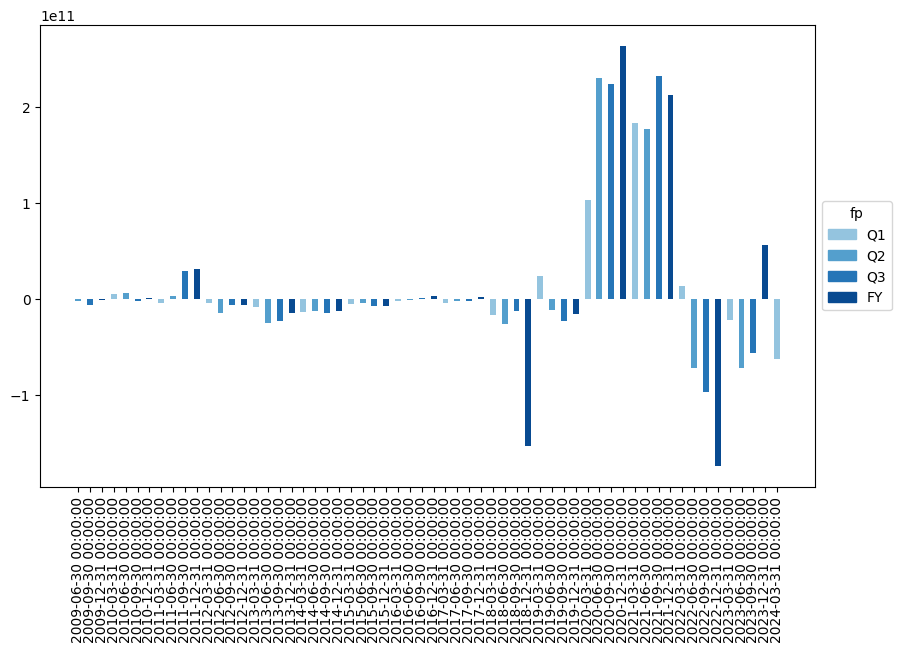

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# using fp to define the color
unique_fp = ['Q1', 'Q2', 'Q3', 'FY']
blues = plt.cm.Blues(np.linspace(0.4, 0.9, len(unique_fp)))
color_map = {fp: color for fp, color in zip(unique_fp, blues)}

# create bar chart
plt.figure(figsize=(10, 6)) 

# calculate bar width
bar_width = 2.0 / len(reports_of_19617['fp'].unique())

for index, row in reports_of_19617.iterrows():
    # add bars in the right color
    plt.bar(index, row['CashPeriodIncreaseDecreaseIncludingExRateEffectFinal'], width=bar_width, color=color_map[row['fp']], label=row['fp'])

# add legend
legend_labels = [plt.Rectangle((0,0),1,1, color=color_map[fp]) for fp in unique_fp]
plt.legend(legend_labels, unique_fp, title='fp', loc='center left', bbox_to_anchor=(1, 0.5))

# x-axis labels
plt.xticks(range(len(reports_of_19617)), reports_of_19617['date'], rotation=90)

# show diagramm
plt.show()

Let us visualize some data for apple: -> cik 320193

But this time, we will just visualze the data for the annual reports.

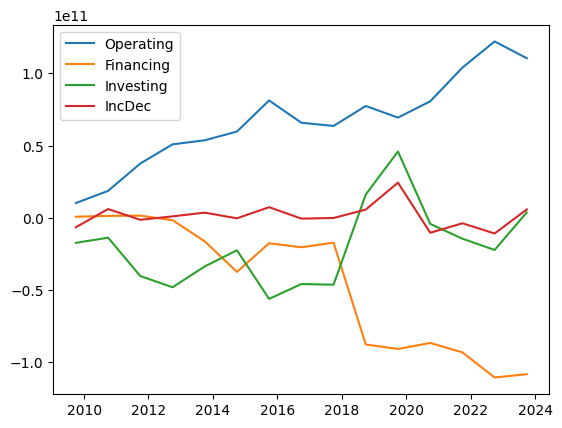

In [14]:
import matplotlib.pyplot as plt
apple_reports_df = cf_standardizer_result_bag.result_df[(cf_standardizer_result_bag.result_df.cik==320193) & mask_FY]

# Plotting
plt.plot(apple_reports_df['date'], apple_reports_df['NetCashProvidedByUsedInOperatingActivities'], label='Operating', linestyle='-')
plt.plot(apple_reports_df['date'], apple_reports_df['NetCashProvidedByUsedInFinancingActivities'], label='Financing', linestyle='-')
plt.plot(apple_reports_df['date'], apple_reports_df['NetCashProvidedByUsedInInvestingActivities'], label='Investing', linestyle='-')
plt.plot(apple_reports_df['date'], apple_reports_df['CashPeriodIncreaseDecreaseIncludingExRateEffectFinal'], label='IncDec', linestyle='-')
plt.legend()


### Compare companies

Let's visualize and compare the history of the NetCashProvidedByUsedInOperatingActivities for a few companies. We just use the yearly reports.

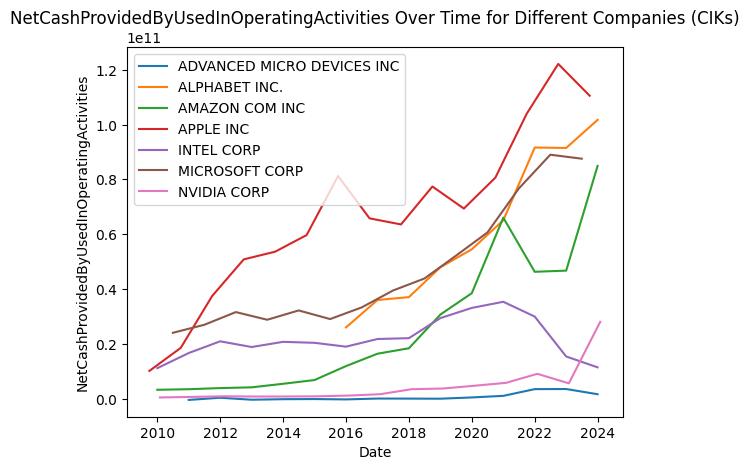

In [15]:
import matplotlib.pyplot as plt
ciks_to_consider = [320193, 789019, 1652044, 1045810, 1018724, 2488, 50863] # Apple, Microsoft, Alphabet, nvidia, Amazon, AMD, intel
df = cf_standardizer_result_bag.result_df[cf_standardizer_result_bag.result_df.cik.isin(ciks_to_consider) & mask_FY].copy()

# Group by 'name' and plot GrossProfit for each group
# Note: using the `present` method ensured that the same cik has always the same name even if the company name did change in the past
for name, group in df.groupby('name'):
    plt.plot(group['date'], group['NetCashProvidedByUsedInOperatingActivities'], label=name, linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('NetCashProvidedByUsedInOperatingActivities')
plt.title('NetCashProvidedByUsedInOperatingActivities Over Time for Different Companies (CIKs)')

# Display legend
plt.legend()

### Conclusion

With the Cash Flow Standardizer, we have the possibility to actually compare data between companies and also to create input for ML models. 

The great thing is, that we can do this with official and free data of over 300'000 reports filed by about 14'000 companies since 2010 (by end of 2023).

Thanks to secfsdstools package, we have the possibility to gather and filter the data in a simple and efficient way, which otherwise would only be possible if you pay for the data. And you have all the data on your computer, no need for using slow api calls.

The Standardizer framework is simple and can be extended with additional rules to make other data points available. With the validation rules we also have a way to assess the quality of single rows in the dataset.

Of course, calculating financial ratios based on the standardized dataset is really simple now.

Also the size of the standardized dataset (about 30MB) is really easy to handle.

## Rules

**Note:** 

**The following section tries to explain how the results are calculated and what kind of rules are applied. It isn't really necessary to understand this section in detail, but it gives you an idea what happens under the hood.**

Let us see how often which rule was applied. This gives an idea about how much "calculation" had to be done in order to create a standardized dataset. We can to this by looking at the `applied_rules_sum_s` pandas Series object.

(If you compare it to the 'IncomeStatementStandardizer, you see that there are less rules in the 'CashFlowStandardizer'. Moreover, the MAIN rules are also only executed once, since the main datapoints are almost always reported and don't need to be calculated)

### How often was a rule applied

In [16]:
cf_standardizer_result_bag.applied_rules_sum_s

0
NaN                                                                                                                                                                                                                                                                                                                                                0
PREPIVOT_CF_PREPIV_#2_MaxQtr                                                                                                                                                                                                                                                                                                                 3768989
PREPIVOT_CF_PREPIV_#5_CashEndOfPeriod                                                                                                                                                                                                                                                                                       

### Applied Rules
To be able to assess the content of `applied_rules_sum_s`  we need to understand the rules that are applied. The simplest way to do this is to print the description of them:

In [17]:
cf_standardizer_result_bag.process_description_df

,part,type,ruleclass,identifier,description
0,PREPIVOT,Group,,PREPIVOT_CF_PREPIV,
1,PREPIVOT,Rule,PrePivotDeduplicate,PREPIVOT_CF_PREPIV_#1_DeDup,"Deduplicates the dataframe based on the columns ['adsh', 'coreg', 'report', 'ddate', 'qtrs', 'tag', 'version', 'value']"
2,PREPIVOT,Rule,PrePivotMaxQtrs,PREPIVOT_CF_PREPIV_#2_MaxQtr,Removes the entries that have a bigger qtrs value than 4
3,PREPIVOT,Rule,PrePivotCorrectSign,PREPIVOT_CF_PREPIV_#3_CorSign,"Ensures that the tags ['ProceedsFromDivestitureOfBusinessesNetOfCashDivested', 'ProceedsFromIssuanceOfCommonStock', 'ProceedsFromIssuanceOfDebt', 'ProceedsFromMaturitiesPrepaymentsAndCallsOfAvailableForSaleSecurities', 'ProceedsFromSaleAndMaturityOfOtherInvestments', 'ProceedsFromSaleOfAvailableForSaleSecurities', 'ProceedsFromSaleOfHeldToMaturitySecurities', 'ProceedsFromSaleOfIntangibleAssets', 'ProceedsFromSaleOfPropertyPlantAndEquipment', 'ProceedsFromStockOptionsExercised', 'AmortizationOfDeferredCharges', 'AmortizationOfFinancingCosts', 'AmortizationOfIntangibleAssets', 'Depletion', 'Depreciation', 'DepreciationAndAmortization', 'DepreciationDepletionAndAmortization'] have a positive value. Applied when the expectation of having a negative or positive value is not met"
4,PREPIVOT,Rule,PrePivotCorrectSign,PREPIVOT_CF_PREPIV_#4_CorSign,"Ensures that the tags ['PaymentsForRepurchaseOfCommonStock', 'PaymentsOfDividends', 'PaymentsOfDividendsCommonStock', 'PaymentsOfDividendsMinorityInterest', 'PaymentsOfDividendsPreferredStockAndPreferenceStock', 'PaymentsToAcquireBusinessesNetOfCashAcquired', 'PaymentsToAcquireIntangibleAssets', 'PaymentsToAcquireInvestments', 'PaymentsToAcquirePropertyPlantAndEquipment', 'RepaymentsOfDebt'] have a negative value. Applied when the expectation of having a negative or positive value is not met"
5,PREPIVOT,Rule,PrePivotCashAtEndOfPeriod,PREPIVOT_CF_PREPIV_#5_CashEndOfPeriod,"Adds copies of rows for ['Cash', 'CashAndDueFromBanks', 'CashAndCashEquivalentsAtCarryingValue', 'CashAndCashEquivalentsAtCarryingValueIncludingDiscontinuedOperations', 'CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents', 'CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperations', 'CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperations'] with the 'qtrs' set to the values thatare present for the corresponding 'adsh' and extending the tag name with 'EndOfPeriod'."
6,PRE,Group,,PRE_CF_PRE,
7,PRE,Rule,PreCorrectMixUpContinuingOperations,PRE_CF_PRE_#1_NetCashProvidedByUsedInOperatingActivities,"Checks for reports where 'NetCashProvidedByUsedInContinuingOperations' was used instead of NetCashProvidedByUsedInOperatingActivities.Looks where NetCashProvidedByUsedInContinuingOperations and NetCashProvidedByUsedInFinancingActivities were set, but $NetCashProvidedByUsedInOperatingActivities is nan.In this cases, the value from NetCashProvidedByUsedInContinuingOperations is copied to NetCashProvidedByUsedInOperatingActivities and NetCashProvidedByUsedInContinuingOperations is set to nan afterwards."
8,MAIN,Group,,MAIN_CF,
9,MAIN,Group,,MAIN_CF_#1_NETCASH,


Let's discuss them in more detail.

**PrePivotRules**
- `PrePivotDeduplicate`: Some data points appear more than once, so we have to deduplicate them to be able to pivot the data
- `PrePivotMaxQtrs`: We are only interested in data points with qtrs <= 4
- `PrePivotCorrectSign`: There are two rules to correct the sign of values. There are data points, which always should be a positive number, for instance values for tags with the prefix 'Proceeds' should be positive and values for tags with the prefix 'Payments' should be negative. However, sometimes data is entered the wrong way, or the 'inverted' flag was set falsely.
- `PrePivotCashAtEndOfPeriod`: An important part of the Cash Flow statement is the 'Cash' at end of period. One problem is, that the cash at end of period is a data point that indicates a point in time, and therefore has 'qtrs' set to 0. However, all other datapoints of the Cash Flow statements, are value that cover a period of time, and therefore have values from 1-4 in the 'qtrs' column. Since we have to use the 'qtrs' column when we pivot, and therefore also group the datapoints, we would lose 'Cash' at the end of period. So this rule creates copies of the Cash data points with appropriate 'qtrs' values. Moreover, it also includes the suffix 'EndOfPeriod' to all tags which could indicate 'Cash' at the end of Period.

**PreRules**
- `PreCorrectMixUpContinuingOperations`: In a Cash Flow statement, companies separate data points for continuing and discontinued activivities by using the appropriate tags. Continuing operation activities are tagged with`NetCashProvidedByUsedInXYZActivitiesContinuingOperations` and discontinued operation activities are tagged with `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` (where XYZ is either Operating, Financing, or Investing). Then there is also the `NetCashProvidedByUsedInXYZActivities` which should contain the sum of continuing and discontinued operation. When a company doesn't report discontinued operation (btw, only about 5% of the reports contain discontinued operation data points), they could use either `NetCashProvidedByUsedInXYZActivitiesContinuingOperations` or `NetCashProvidedByUsedInXYZActivities` since `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` is 0 in these cases. And in fact, in these cases, most of the time the `NetCashProvidedByUsedInXYZActivities` is used to report continuing operation (about 80% of the cases). However, there are reports which us `NetCashProvidedByUsedInXYZActivities` to report continuing activities, when they also report discontinued activities. Which is wrong. This rule is a first rule, which detects and corrects such cases. There is another POST rule at the very end, which detects additional cases like that.

**MainRules**
- `MAIN_CF_#1_NETCASH_#1/2/3_CashProvidedByUsedInXYZActivitiesDiscontinuedOperations<-CashProvidedByUsedInDiscontinuedOperationsXYZActivities`<br> As mentioned before, discontinued operations reported with the tag `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` (again, XYZ is either operating, financing, or investing). However, there are very few reports, which use the tag `CashProvidedByUsedInDiscontinuedOperationsXYZActivities` instead. So if the latter one is used, we just rename it.
- `MAIN_CF_#1_NETCASH_#4/5/6_NetCashProvidedByUsedInXYZActivities`<br> Next, we calculate the sum tags NetCashProvidedByUsedInXYZActivities, if not already set, by adding tags for continuing and discontinued activities.
- `MAIN_CF_#2_EFF_EXRATE` (Group) <br>This group defines the `EffectOfExchangeRateFinal` (Note: this is not an official US-GAAP tag and we use it to have a shorter name). There are two 'paths', how `EffectOfExchangeRateFinal` can be calculated. The first is to define 
`EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperations` if not set by adding `EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents` and `EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperations`. If `EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents` it could also be that `EffectOfExchangeRateOnCash` or `EffectOfExchangeRateOnCashAndCashEquivalents` was used. This path is used in about 90% of the reports were EffectOfExchangeRate is reported. The second path is the sum of `EffectOfExchangeRateOnCashAndCashEquivalentsContinuingOperations` and `EffectOfExchangeRateOnCashAndCashEquivalentsDiscontinuedOperations`. Instead of those two tags, also the tags `EffectOfExchangeRateOnCashContinuingOperations` and `EffectOfExchangeRateOnCashDiscontinuedOperations` could be used.
- `MAIN_CF_#3_INC_DEC` (Group) <br>This group defines the `CashPeriodIncreaseDecreaseIncludingExRateEffectFinal` (Note: this is not an official US-GAAP tag name and is just used to have a shorter name). There are three tags, which could report CashPeriodIncDec. First priority is  `CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect`. Second priority is `CashAndCashEquivalentsPeriodIncreaseDecrease`. Third priority is `CashPeriodIncreaseDecrease`.
- `MAIN_CF_#4_EOP` (Group) <br>This group defines the `CashAndCashEquivalentsEndOfPeriod` (Note: this is not an official US-GAAP tag name and is just used to have a shorter name). There are multiple tags, which can indicate the Cash at a certain point in time and therefore can appear in a report. `CashAndCashEquivalentsEndOfPeriod` is set with the value of the following tags, where as the order is the priority: `CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperationsEndOfPeriod`, `CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperationsEndOfPeriod`, `CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsEndOfPeriod`, `CashAndCashEquivalentsAtCarryingValueIncludingDiscontinuedOperationsEndOfPeriod`, `CashAndCashEquivalentsAtCarryingValueEndOfPeriod`, `CashAndDueFromBanksEndOfPeriod`, `CashEndOfPeriod` (Note: the suffix was added by the PrePivotCashAtEndOfPeriod rule).
- `MAIN_CF_#5_DeprDeplAmort` (Group) <br>This group of rules evaluates the final value for `DepreciationDepletionAndAmortization` according to the following formula:
    <pre>
                      + AmortizationOfIntangibleAssets
                      + AmortizationOfDeferredCharges
                      + AmortizationOfFinancingCosts
                      -------------
                    + Amortization
                    + Depreciation
                    --------------
                  + DepreciationAndAmortization
                  + Depletion
                  ----------
                    DepreciationDepletionAndAmortization
    </pre>
- `MAIN_CF_#6_ProSalesInvest_#1_ProceedsFromSaleOfInvestments`<br> Calculates the `ProceedsFromSaleOfInvestments` by summing up the values of `ProceedsFromSaleOfAvailableForSaleSecurities`, `ProceedsFromSaleOfTradingSecurities`, `ProceedsFromSaleOfEquitySecurities`, `ProceedsFromSaleOfDebtSecurities`, `ProceedsFromSaleAndMaturityOfOtherInvestments`, `ProceedsFromMaturitiesPrepaymentsAndCallsOfAvailableForSaleSecurities`, `ProceedsFromSaleOfInvestmentsInAffiliates`, `ProceedsFromSaleOfHeldToMaturitySecurities`
- `MAIN_CF_#7_PayDividends_#1_PaymentsOfDividends` <br> Calculates the `PaymentsOfDividends` by summing up the values of `PaymentsOfDividendsCommonStock`, `PaymentsOfDividendsPreferredStockAndPreferenceStock`, `PaymentsOfDividendsMinorityInterest`

**PostRules**
- `POST_CF_#1/4/7_CashProvidedByUsedInXYZActivitiesDiscontinuedOperations`: <br> If `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` is not set, calculate it by `NetCashProvidedByUsedInXYZActivities` - `NetCashProvidedByUsedInXYZActivitiesContinuingOperations`
- `POST_CF_#2/5/8_NetCashProvidedByUsedInXYZActivitiesContinuingOperations`: <br> If `NetCashProvidedByUsedInXYZActivitiesContinuingOperations` is not set, calculate it by `NetCashProvidedByUsedInXYZActivities` - `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations`
- `POST_CF_#3/6/9_NetCashProvidedByUsedInXYZActivitiesContinuingOperations/CashProvidedByUsedInXYZActivitiesDiscontinuedOperations`: <br> if onl< `NetCashProvidedByUsedInXYZActivities` is set, then assume that only continuing activities are reported and therfore set `NetCashProvidedByUsedInXYZActivitiesContinuingOperations` to `NetCashProvidedByUsedInXYZActivities` and set `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` to 0.0
- `POST_CF_#10..8`: <br> If `NetCashProvidedByUsedInXYZActivitiesContinuingOperations`, `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations`, or `NetCashProvidedByUsedInXYZActivities` were not set yet, set them 0
- `POST_CF_#19_EffectOfExchangeRateFinal`: <br> If `EffectOfExchangeRateFinal` is not set, set it to 0.0
- `POST_CF_#20_CashPeriodIncreaseDecreaseIncludingExRateEffectFinal`: <br> if `CashPeriodIncreaseDecreaseIncludingExRateEffectFinal` is not set yet, set it by summing up `NetCashProvidedByUsedInOperatingActivities`, `NetCashProvidedByUsedInInvestingActivities`, `NetCashProvidedByUsedInFinancingActivities`, `EffectOfExchangeRateFinal`
- `POST_CF_#21_..` <br> This is the second rule that identifies cases, where `NetCashProvidedByUsedInXYZActivities` was used to report continuing activities instead of `NetCashProvidedByUsedInXYZActivitiesContinuingOperations`. 

**ValidationRules**
There are five validation rules:
- `NetCashProvidedByUsedInOperatingActivities` =  `NetCashProvidedByUsedInOperatingActivitiesContinuingOperations` + `CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations`
- `NetCashProvidedByUsedInFinancingActivities` =  `NetCashProvidedByUsedInFinancingActivitiesContinuingOperations` + `CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations`
- `NetCashProvidedByUsedInInvestingActivities` =  `NetCashProvidedByUsedInInvestingActivitiesContinuingOperations` + `CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations`
- `CashPeriodIncreaseDecreaseIncludingExRateEffectFinal` = `NetCashProvidedByUsedInOperatingActivities` + `NetCashProvidedByUsedInFinancingActivities` + `NetCashProvidedByUsedInInvestingActivities` + `EffectOfExchangeRateFinal`
- `CashAndCashEquivalentsEndOfPeriod` is set

The following overview tries to show the whole "algorithm" in textform:

     PrePivot Rules
       Deduplicate by ['adsh', 'coreg', 'report', 'ddate', 'uom', 'qtrs', 'tag', 'version']
       Filter for qtrs <= 4
       CorrectSign: should be a positive number     
                                'ProceedsFromDivestitureOfBusinessesNetOfCashDivested', 'ProceedsFromIssuanceOfCommonStock',
                                'ProceedsFromIssuanceOfDebt', 'ProceedsFromMaturitiesPrepaymentsAndCallsOfAvailableForSaleSecurities',
                                'ProceedsFromSaleAndMaturityOfOtherInvestments', 'ProceedsFromSaleOfAvailableForSaleSecurities',
                                'ProceedsFromSaleOfHeldToMaturitySecurities', 'ProceedsFromSaleOfIntangibleAssets',
                                'ProceedsFromSaleOfPropertyPlantAndEquipment', 'ProceedsFromStockOptionsExercised',
                                'AmortizationOfDeferredCharges', 'AmortizationOfFinancingCosts',
                                'AmortizationOfIntangibleAssets', 'Depletion',
                                'Depreciation', 'DepreciationAndAmortization',
                                'DepreciationDepletionAndAmortization',
       
       CorrectSign: should be a negative number
                                'PaymentsForRepurchaseOfCommonStock',
                                'PaymentsOfDividends',
                                'PaymentsOfDividendsCommonStock',
                                'PaymentsOfDividendsMinorityInterest',
                                'PaymentsOfDividendsPreferredStockAndPreferenceStock',
                                'PaymentsToAcquireBusinessesNetOfCashAcquired',
                                'PaymentsToAcquireIntangibleAssets',
                                'PaymentsToAcquireInvestments',
                                'PaymentsToAcquirePropertyPlantAndEquipment',
                                'RepaymentsOfDebt',
     
       Ensure that CashAtEndOfPeriod information is available for every period
     
     
     Pre Rules
        Fix mixed up usage of NetCashProvidedByUsedXYZActivities/-ContinuingOperations
     
     Main Rules
          + NetCashProvidedByUsedInOperatingActivitiesContinuingOperations
          + CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations <- CashProvidedByUsedInDiscontinuedOperationsOperatingActivities
          --------
      + NetCashProvidedByUsedInOperatingActivities

          + NetCashProvidedByUsedInInvestingActivitiesContinuingOperations
          + CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations <- CashProvidedByUsedInDiscontinuedOperationsInvestingActivities
          --------
      + NetCashProvidedByUsedInInvestingActivities

          + NetCashProvidedByUsedInInvestingActivitiesContinuingOperations
          + CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations <- CashProvidedByUsedInDiscontinuedOperationsFinancingActivities
          --------
      + NetCashProvidedByUsedInInvestingActivities


                  Prio 1
                           <- EffectOfExchangeRateOnCash
                       <- EffectOfExchangeRateOnCashAndCashEquivalents
                  + EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents
                  + EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperations
                  --------
                  EffectOfExchangeRateOnCashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperations
                 <-
              EffectOfExchangeRateFinal


                  Prio 2
                  + EffectOfExchangeRateOnCashAndCashEquivalentsContinuingOperations <- EffectOfExchangeRateOnCashContinuingOperations
                  + EffectOfExchangeRateOnCashAndCashEquivalentsDiscontinuedOperations <- EffectOfExchangeRateOnCashDiscontinuedOperations
                  --------
              EffectOfExchangeRateFinal


      + EffectOfExchangeRateFinal
      ---------------------------

                   <- CashPeriodIncreaseDecrease
             <- CashAndCashEquivalentsPeriodIncreaseDecrease
        <- CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect
      CashPeriodIncreaseDecreaseIncludingExRateEffectFinal
      ==================

                                       <- CashEndOfPeriod
                                  <- CashAndDueFromBanksEndOfPeriod
                             <- CashAndCashEquivalentsAtCarryingValueEndOfPeriod
                        <- CashAndCashEquivalentsAtCarryingValueIncludingDiscontinuedOperationsEndOfPeriod
                   <- CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsEndOfPeriod
              <- CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperationsEndOfPeriod
        <- CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperationsEndOfPeriod
      CashAndCashEquivalentsEndOfPeriod


      Details of Operating Activities

                  + AmortizationOfIntangibleAssets
                  + AmortizationOfDeferredCharges
                  + AmortizationOfFinancingCosts
                  -------------
                + Amortization
                + Depreciation
                --------------
                + DepreciationAndAmortization
                + Depletion
                ----------
            DepreciationDepletionAndAmortization

            DeferredIncomeTaxExpenseBenefit
            ShareBasedCompensation
            IncreaseDecreaseInAccountsPayable
            IncreaseDecreaseInAccruedLiabilities
            InterestPaidNet
            IncomeTaxesPaidNet


      Details of Investing activities

                + ProceedsFromSaleOfAvailableForSaleSecurities
                + ProceedsFromSaleOfTradingSecurities
                + ProceedsFromSaleOfEquitySecurities
                + ProceedsFromSaleOfDebtSecurities
                + ProceedsFromSaleAndMaturityOfOtherInvestments
                + ProceedsFromMaturitiesPrepaymentsAndCallsOfAvailableForSaleSecurities
                + ProceedsFromSaleOfInvestmentsInAffiliates
                + ProceedsFromSaleOfHeldToMaturitySecurities
                --------------------------------------------
            ProceedsFromSaleOfInvestments

            PaymentsToAcquirePropertyPlantAndEquipment
            ProceedsFromSaleOfPropertyPlantAndEquipment
            PaymentsToAcquireInvestments
            PaymentsToAcquireBusinessesNetOfCashAcquired
            ProceedsFromDivestitureOfBusinessesNetOfCashDivested
            PaymentsToAcquireIntangibleAssets
            ProceedsFromSaleOfIntangibleAssets


      Details of Financing activities

                  + PaymentsOfDividendsCommonStock
                  + PaymentsOfDividendsPreferredStockAndPreferenceStock
                  + PaymentsOfDividendsMinorityInterest
                  -------------
             PaymentsOfDividends

             ProceedsFromIssuanceOfCommonStock
             ProceedsFromStockOptionsExercised
             PaymentsForRepurchaseOfCommonStock
             ProceedsFromIssuanceOfDebt
             RepaymentsOfDebt

     Post Rules

        Calculate missing "Operating" tags

        + NetCashProvidedByUsedInOperatingActivities (if present)
        - NetCashProvidedByUsedInOperatingActivitiesContinuingOperations (if present)
        -------
        = CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations (if not present)


        + NetCashProvidedByUsedInOperatingActivities (if present)
        - CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations (if present)
        -------
        = NetCashProvidedByUsedInOperatingActivitiesContinuingOperations (if not present)


        if only NetCashProvidedByUsedInOperatingActivities is set:
          NetCashProvidedByUsedInOperatingActivitiesContinuingOperations = NetCashProvidedByUsedInOperatingActivities
          CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations = 0


        Same as above for Financing and Investing triples

        Set to Zero if still not set:
           NetCashProvidedByUsedInOperatingActivitiesContinuingOperations
           NetCashProvidedByUsedInInvestingActivitiesContinuingOperations
           NetCashProvidedByUsedInFinancingActivitiesContinuingOperations
           NetCashProvidedByUsedInOperatingActivities
           NetCashProvidedByUsedInInvestingActivities
           NetCashProvidedByUsedInFinancingActivities
           CashProvidedByUsedInOperatingActivitiesDiscontinuedOperations
           CashProvidedByUsedInInvestingActivitiesDiscontinuedOperations
           CashProvidedByUsedInFinancingActivitiesDiscontinuedOperations

           EffectOfExchangeRateFinal

        Set CashPeriodIncreaseDecreaseIncludingExRateEffectFinal (if not set yet)
            + NetCashProvidedByUsedInOperatingActivities
            + NetCashProvidedByUsedInInvestingActivities
            + NetCashProvidedByUsedInFinancingActivities
            + EffectOfExchangeRateFinal
            ------------------
            = CashPeriodIncreaseDecreaseIncludingExRateEffectFinal

        Fix mixed up usage of NetCashProvidedByUsed...Activities/-ContinuingOperations


### Overview on applied rules
It might be interesting to know how many rules are applied in general per report. In this example, we just look at the MAIN and PRE rules:

In [18]:
# just use a shorter variable name
df=cf_standardizer_result_bag.applied_rules_log_df

# we are just interested in the MAIN and PRE rules
filtered_columns = df.columns[df.columns.str.contains('MAIN|PRE')]

# count how many True values are in each row
df['count_true_values'] = df[filtered_columns].sum(axis='columns')

df.count_true_values.value_counts().sort_index()

count_true_values
0      2519
1      1007
2      8891
3     13453
4     20854
5     20440
6     23736
7     54258
8     35588
9     34991
10    41730
11    26596
12    22302
13    15914
14     6955
15     3708
16     2009
17      742
18      128
19       32
20       12
Name: count, dtype: int64

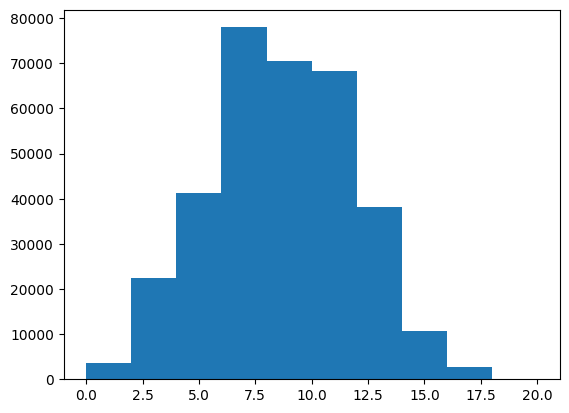

In [19]:
import matplotlib.pyplot as plt

plt.hist(df.count_true_values)

# Show the plot
plt.show()

### Showing the applied rules for a specific report number
If we analys a single report and want to know which rules were applied, we can do that with the following code:

In [20]:
apple_10k_2022 = "0000320193-22-000108"
apple_10k_2022_applied_rules_log_df = cf_standardizer_result_bag.applied_rules_log_df[cf_standardizer_result_bag.applied_rules_log_df.adsh==apple_10k_2022]

# filter for the applied MAIN,PRE, and POST rules
main_rule_cols =  df.columns[df.columns.str.contains('MAIN|PRE|POST')]
main_rule_df = apple_10k_2022_applied_rules_log_df[main_rule_cols]

# get the applied rules, by using the True and False values of main_rule_df.iloc[0] as a mask on the columns index
main_rule_df.columns[main_rule_df.iloc[0]].tolist()

['MAIN_1_CF_#3_INC_DEC_#3_CashPeriodIncreaseDecreaseIncludingExRateEffectFinal<-CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect',
 'MAIN_1_CF_#4_EOP_#5_CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperationsEndOfPeriod<-CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsEndOfPeriod',
 'MAIN_1_CF_#4_EOP_#6_CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperationsEndOfPeriod<-CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsDisposalGroupIncludingDiscontinuedOperationsEndOfPeriod',
 'MAIN_1_CF_#4_EOP_#7_CashAndCashEquivalentsEndOfPeriod<-CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsIncludingDisposalGroupAndDiscontinuedOperationsEndOfPeriod',
 'MAIN_1_CF_#6_ProSalesInvest_#1_ProceedsFromSaleOfInvestments',
 'POST_CF_#3_NetCashProvidedByUsedInOperatingActivitiesContinuingOperations/CashProvid

- **MAIN_1_CF_#3_INC_DEC_#3_CashPeriodIncreaseDecreaseIncludingExRateEffectFinal<-CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect'**: This is just a renaming to have a shorter name
- **MAIN_1_CF_#4_EOP_#5/6/7..**: Apple reports Cash with the tag  `CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsEndOfPeriod` so this three rules just propagate its value to the tag `CashAndCashEquivalentsEndOfPeriod`
- **MAIN_1_CF_#6_ProSalesInvest_#1_ProceedsFromSaleOfInvestments**: Apple has some income from sale of investments, this rule sums them up
- **POST_CF_#3/6/9..**: Apple did not report discontinued activities and did report its operating activities with the `NetCashProvidedByUsedInXYZActivities` tag. In order to be comparable, its value is copied to the `NetCashProvidedByUsedInXYZActivitiesContinuingOperations` and `CashProvidedByUsedInXYZActivitiesDiscontinuedOperations` is set to 0
- **POST_CF_#19_EffectOfExchangeRateFinal**:  Apple didn't report any EffectOnExchangeRate, so this tag is set to 0

Compare it to the real report: https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm

As a conclusion, in the case of apples 2022 annual report, we just rename entries to standardized tag names and set values to 0, both of which are not critical.